In [1]:
from tinyphysics import TinyPhysicsModel, TinyPhysicsSimulator, CONTROL_START_IDX
from controllers import pid, BaseController
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme()


C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plot_rollout(sim):
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(sim.target_lataccel_history, label="Target Lateral Acceleration", alpha=0.5)
  ax.plot(sim.current_lataccel_history, label="Actual Lateral Acceleration", alpha=0.5)
  ax.legend()
  ax.set_xlabel("Step")
  ax.set_ylabel("Lateral Acceleration")
  ax.set_title("Rollout")
  plt.show()

In [3]:
model = TinyPhysicsModel("./models/tinyphysics.onnx", debug=True)

In [4]:
class Controller(BaseController):
  """
  A simple PID controller
  """
  def __init__(self,):
    self.p = 0.3
    self.i = 0.05
    self.d = -0.1
    self.error_integral = 0
    self.prev_error = 0

  def update(self, target_lataccel, current_lataccel, state, future_plan):
      error = (target_lataccel - current_lataccel)
      self.error_integral += error
      error_diff = error - self.prev_error
      self.prev_error = error
      return self.p * error + self.i * self.error_integral + self.d * error_diff


controller = Controller()

sim = TinyPhysicsSimulator(model, "./data/00000.csv", controller=controller, debug=False)
cost = sim.rollout()["total_cost"]

104.88711943141546

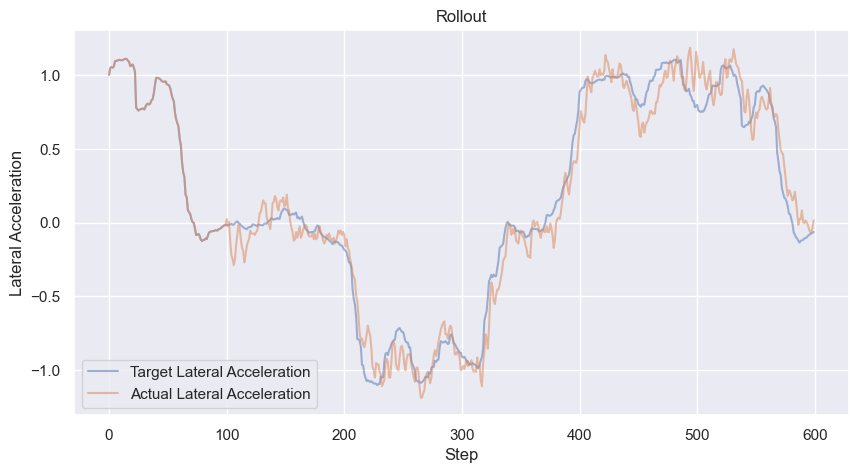

In [5]:
plot_rollout(sim)